#### 1. La paradoja de la amistad
En 1991 el sociólogo Scott L. Feld realizó un experimento en el que observó que, en promedio, la mayoría de las personas tiene menos amigos que sus amigos. Considere la siguiente formula que expresa el grado promedio de los vecinos de un nodo de grado $k$

<center>$k_{nn}(k)=\frac {<k^2>}{<k>}$</center>

Recuerde que para efectos prácticos $<k^n>=\frac {1}{N}\sum_{i=1}^{N} k_i^n$, con $N$ el número de nodos presentes en el grafo y $k_i$ el grado del nodo $i$

**a)** Muestre que la diferencia entre $k_{nn}(k)$ y $<k>$ es positiva. Para esto recuerde que la varianza se puede escribir como $Var(k)=<k^2>-<k>^2$.

$k_{nn}(k)$ $-$ $<k>$ = $\frac {<k^2>}{<k>}$ $-$ $<k>$

$<k^2>=\frac {1}{N}\sum_{i=1}^{N} k_i^2$

$\frac {<k^2>}{<k>}$ $-$ $<k>$ = $\frac {<k^2> - <k>^2}{<k>}$

**b)** Usado lo demostrado anteriormente, fundamente la existencia de la paradoja de la amistad.

**c)** Usando el paquete Networkx, genere un grafo de Erdös-Rényi ($p=$0.01), de Watts-Strogatz ($p=$0.6, $k=$3) y de Barabási-Albert ($m=$3) con 100 nodos cada uno. Verifique que la paradoja se presenta en los tres casos.

C:\Users\Marcelo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


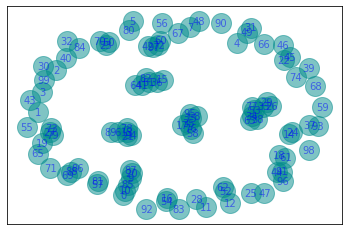

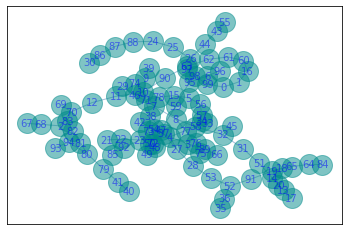

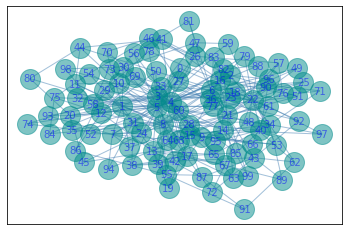

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
%matplotlib inline 

G_er = nx.erdos_renyi_graph(n=100,p=0.01)
G_ws = nx.watts_strogatz_graph(100,p=0.6,k=3)
G_ba = nx.barabasi_albert_graph(n=100,m=3)

nx.draw_networkx(G_er,node_size =400,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue'
                 ,font_size = 10, font_color = 'blue')
plt.show()

nx.draw_networkx(G_ws,node_size =400,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue'
                 ,font_size = 10, font_color = 'blue' )
plt.show()

nx.draw_networkx(G_ba,node_size =400,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue'
                 ,font_size = 10, font_color = 'blue' )
plt.show()

**d)** Para cada grafo, dibuje una distribución de sus grados (histograma) y sobre ellos dibuje las rectas verticales $x=\frac {<k^2>}{<k>}$ y $x=<k>$

In [2]:
def x_vert_calc(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
    k_2 = 0
    k = 0
    c = 0
    for d in degree_sequence:
        k_2 += d*d
        k += d
        c += 1
    k_2 = k_2/c
    k = k/c
    x = k_2/k
    dif_k = k_2-k*k
    return x,k,dif_k

0.11555555555555555


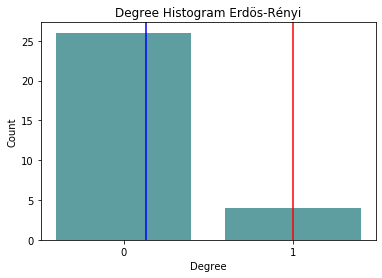

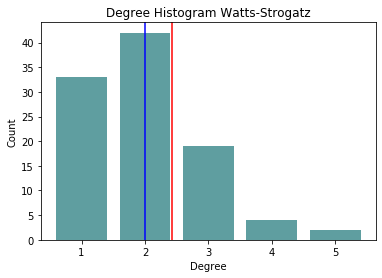

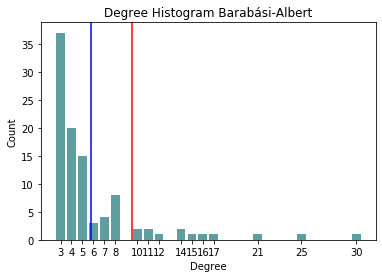

In [154]:
degree_sequence = sorted([d for n, d in G_er.degree()], reverse=True)  # degree sequence
#print(degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()

plt.bar(deg,cnt,width=0.8, color='cadetblue')
plt.title("Degree Histogram Erdös-Rényi")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
x1, x2, dif_k = x_vert_calc(G_er)
print(dif_k)
plt.axvline(x=x1, color='red', label='x1')
plt.axvline(x=x2, color='blue', label='x2')
plt.show()

degree_sequence = sorted([d for n, d in G_ws.degree()], reverse=True)  # degree sequence
#print(degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg,cnt,width=0.8, color='cadetblue')
plt.title("Degree Histogram Watts-Strogatz")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
x1, x2, dif_k = x_vert_calc(G_ws)
plt.axvline(x=x1, color='red', label='x1')
plt.axvline(x=x2, color='blue', label='x2')
plt.show()

degree_sequence = sorted([d for n, d in G_ba.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg,cnt,width=0.8, color='cadetblue')
plt.title("Degree Histogram Barabási-Albert")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
x1, x2, dif_k = x_vert_calc(G_ba)
plt.axvline(x=x1, color='red', label='x1')
plt.axvline(x=x2, color='blue', label='x2')
plt.show()

#### 2. Importancia de un nodo
Genere los mismos tres grafos de la pregunta anterior, pero esta vez con 30 nodos cada uno.

**a)** Grafique tres veces, uno al lado de otro, la red de Erdös-Rényi de modo que el tamaño de los nodos sea proporcional a su *degree centrality, closeness centrality y betweenness centrality* respectivamente. Repita el mismo procedimiento para los otros dos grafos.


In [57]:
def centrality(graph,aum=400):
    degree = nx.degree_centrality(graph)
    close = nx.closeness_centrality(graph)
    between = nx.betweenness_centrality(graph)
    size_degree = []
    size_close = []
    size_between = []
    for k in degree:
        size_degree.append(pow(degree.get(k)*aum,2))
        size_close.append(pow(close.get(k)*aum,2))
        size_between.append(pow(between.get(k)*aum,2))     
    return size_degree, size_close, size_between, degree, close, between

C:\Users\Marcelo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


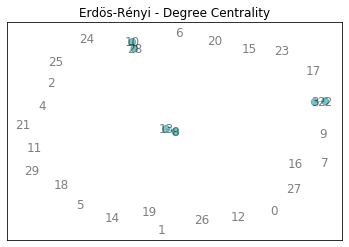

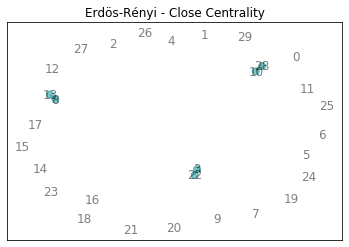

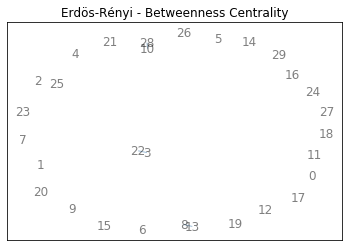

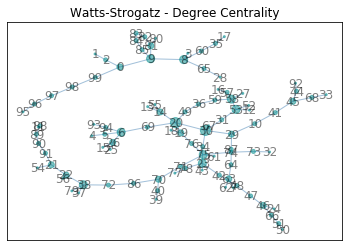

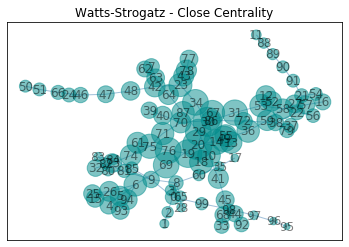

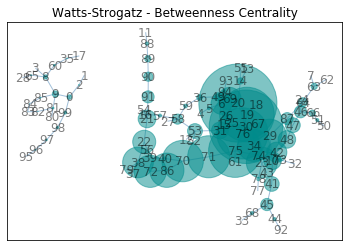

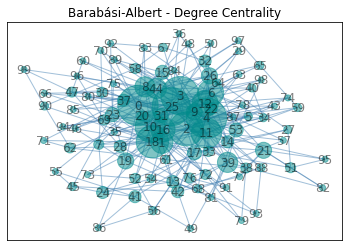

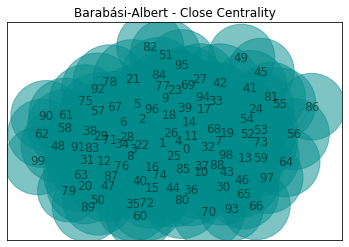

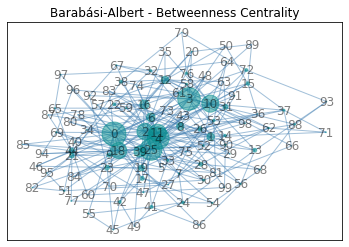

In [155]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
%matplotlib inline 

G_er = nx.erdos_renyi_graph(n=30,p=0.01)
size_degree, size_close, size_between,_,_,_ = centrality(G_er,aum=200)

nx.draw_networkx(G_er,node_size = size_degree,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue')
plt.title("Erdös-Rényi - Degree Centrality")
plt.show()
nx.draw_networkx(G_er,node_size = size_close,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue')
plt.title("Erdös-Rényi - Close Centrality")
plt.show()
plt.title("Erdös-Rényi - Betweenness Centrality")
nx.draw_networkx(G_er,node_size = size_between,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue')
plt.show()


G_ws = nx.watts_strogatz_graph(100,p=0.6,k=3)
size_degree, size_close, size_between,_,_,_ = centrality(G_ws,aum=200)

nx.draw_networkx(G_ws,node_size = size_degree,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue')
plt.title("Watts-Strogatz - Degree Centrality")
plt.show()
nx.draw_networkx(G_ws,node_size = size_close,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue')
plt.title("Watts-Strogatz - Close Centrality")
plt.show()
plt.title("Watts-Strogatz - Betweenness Centrality")
nx.draw_networkx(G_ws,node_size = size_between,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue')
plt.show()


G_ba = nx.barabasi_albert_graph(n=100,m=3)
size_degree, size_close, size_between,_,_,_ = centrality(G_ba,aum=200)

nx.draw_networkx(G_ba,node_size = size_degree,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue')
plt.title("Barabási-Albert - Degree Centrality")
plt.show()
nx.draw_networkx(G_ba,node_size = size_close,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue')
plt.title("Barabási-Albert - Close Centrality")
plt.show()
plt.title("Barabási-Albert - Betweenness Centrality")
nx.draw_networkx(G_ba,node_size = size_between,node_color ='darkcyan', alpha = 0.5, edge_color = 'steelblue')
plt.show()

**b)** Para cada grafo, usando el paquete Pandas, cree un dataframe como se describe a continuación: en la primera columna coloque el nombre de los diez nodos con mayor *score* de *degree centrality*, en la segunda columna escriba el valor del *degree centrality* de cada nodo correspondiente a la primera columna, en la tercera columna escriba el valor del *betweenness centrality* de cada nodo. El header del dataframe debe ser en consecuencia *node_id, degree centrality, closeness centrality, betweenness centrality*.

In [156]:
def create_df_centrality(graph):
    dict_df = {}
    _,_,_,degree,close,between = centrality(graph)
    degree = sorted(degree.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
    close = sorted(close.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
    between = sorted(between.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)

    for nd, dd in degree[0:10]:
        cen_list = []
        cen_list.append(dd)
        for nc, dd in close:        
            if nc == nd:
                cen_list.append(dd)
        for nb, db in between:
            if nb == nd:
                cen_list.append(db)
        dict_df[nd] = cen_list

    df = pd.DataFrame.from_dict(data=dict_df,orient='index',columns=['degree_centrality','closeness_centrality','betweenness_centrality'],dtype='float')
    df.reset_index(inplace=True)
    df.rename(columns={'index':'node_id'},inplace=True)
    return df

In [157]:
df_er = create_df_centrality(G_er)
df_ws = create_df_centrality(G_ws)
df_ba = create_df_centrality(G_ba)

In [162]:
df_er

,node_id,degree_centrality,closeness_centrality,betweenness_centrality
0,28,0.034483,0.034483,0.0
1,22,0.034483,0.034483,0.0
2,13,0.034483,0.034483,0.0
3,10,0.034483,0.034483,0.0
4,8,0.034483,0.034483,0.0
5,3,0.034483,0.034483,0.0
6,29,0.000000,0.000000,0.0
7,27,0.000000,0.000000,0.0
8,26,0.000000,0.000000,0.0
9,25,0.000000,0.000000,0.0


In [159]:
df_ws

,node_id,degree_centrality,closeness_centrality,betweenness_centrality
0,30,0.050505,0.145009,0.367347
1,20,0.050505,0.147147,0.390435
2,75,0.040404,0.120988,0.264894
3,58,0.040404,0.100316,0.050917
4,53,0.040404,0.112362,0.074315
5,38,0.040404,0.081260,0.153577
6,23,0.040404,0.115393,0.155020
7,9,0.040404,0.082492,0.030818
8,8,0.040404,0.071848,0.020820
9,6,0.040404,0.113212,0.104308


In [160]:
df_ba

,node_id,degree_centrality,closeness_centrality,betweenness_centrality
0,4,0.202020,0.500000,0.110465
1,0,0.202020,0.505102,0.119957
2,25,0.191919,0.462617,0.109479
3,3,0.191919,0.500000,0.113049
4,2,0.171717,0.452055,0.082332
5,18,0.161616,0.452055,0.081474
6,11,0.151515,0.469194,0.087167
7,10,0.151515,0.466981,0.085628
8,12,0.131313,0.434211,0.037150
9,6,0.131313,0.452055,0.042757


**c)** Usando sus conocimientos y los puntos anteriores, discuta las diferencias entre los tres tipos de centralidad mencionados.

**d)** Dé al menos un ejemplo de en qué situación sería adecuado considerar la importancia de un nodo como su *score* de *degree centrality, closeness centrality, betweenness centrality*.